In [2]:
# (0단계) 라이브러리 및 그래프 환경 설정
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126374 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


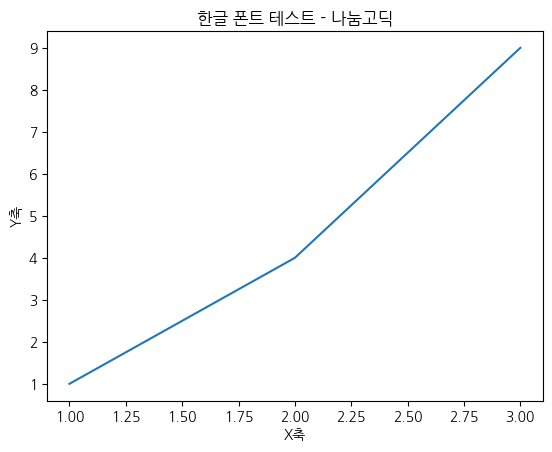

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

# 나눔고딕 폰트 경로 찾기
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=fontpath, size=12)

# 폰트 설정# 1) 나눔 글꼴 설치
!apt-get -qq update
!apt-get -qq install fonts-nanum

# 2) matplotlib 폰트 캐시 삭제 (중요)
import shutil, os
shutil.rmtree(os.path.expanduser("~/.cache/matplotlib"), ignore_errors=True)

# 3) 폰트 수동 등록 + 기본 폰트로 지정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)              # 새 폰트를 매니저에 등록
rcParams["font.family"] = "NanumGothic"        # 기본 폰트로 지정
rcParams["axes.unicode_minus"] = False         # 음수기호 깨짐 방지

# 4) 테스트
plt.plot([1,2,3],[1,4,9])
plt.title("한글 폰트 테스트 - 나눔고딕")
plt.xlabel("X축")
plt.ylabel("Y축")
plt.show()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# (1단계) 데이터 준비

# 데이터 읽기
df = pd.read_csv('BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


변수명:	의미/단위

CRIM:지역별 1인당 범죄율/비율

ZN:25,000 평방피트(약 2323㎡) 이상 주거지/ 비율	%

INDUS:비소매(non-retail) 상업 면적/ 비율	%

CHAS:찰스강(Charles River) 인접 여부/1 = 인접, 0 = 비인접

NOX:대기 오염 지수 (Nitric Oxides 농도)/0.1ppm 단위

RM: 주택당 평균 방(Room) 수/개수

AGE:1940년 이전에 지어진 주택/비율	%

DIS:5개 주요 고용센터까지의 거리/	가중 거리

RAD:방사형 도로 접근성 지수/	정수 값 (1–24)

TAX:1만 달러당 재산세율/달러

PTRATIO:학생-교사 비율 (pupil–teacher ratio)/비율

B:흑인 인구 지수 (1000(Bk - 0.63)²)/	통계적 지표

LSTAT:하위계층(저소득층) 인구 비율/	%

MEDV:자가 주택의 중앙값 가격/단위: 천 달러 ($1000)



In [7]:
df = df[['crim', 'rm', 'dis', 'tax', 'medv']]
titles = ['1인당 범죄율', '방의 개수', '직업센터까지의 거리','재산세', '주택 가격']


In [8]:
# (2단계) 그룹 컬럼 추가
grp = pd.Series(['M' for i in range(len(df))])
grp.loc[df.medv >= 25.0] = 'H'
grp.loc[df.medv <= 17.0] = 'L'
df['grp'] = grp

/tmp/ipython-input-1074581592.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grp'] = grp


In [9]:
# 그룹 컬럼의 자료형과 레이블 순서 변경
new_odr = ['H', 'M', 'L']
new_dtype = CategoricalDtype(categories=new_odr, ordered=True) #범주화
df.grp = df.grp.astype(new_dtype)
df.grp.dtype

/tmp/ipython-input-1623022294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.grp = df.grp.astype(new_dtype)


CategoricalDtype(categories=['H', 'M', 'L'], ordered=True, categories_dtype=object)

In [10]:
# (3단계) 데이터셋의 형태와 기본적인 내용 파악
print(df.shape)
print(df.head())
print(df.dtypes)  # 컬럼별 자료형
print(df.grp.value_counts(sort=False))  # 주택 가격 그룹별 분포

(506, 6)
      crim     rm     dis  tax  medv grp
0  0.00632  6.575  4.0900  296  24.0   M
1  0.02731  6.421  4.9671  242  21.6   M
2  0.02729  7.185  4.9671  242  34.7   H
3  0.03237  6.998  6.0622  222  33.4   H
4  0.06905  7.147  6.0622  222  36.2   H
crim     float64
rm       float64
dis      float64
tax        int64
medv     float64
grp     category
dtype: object
grp
H    132
M    247
L    127
Name: count, dtype: int64


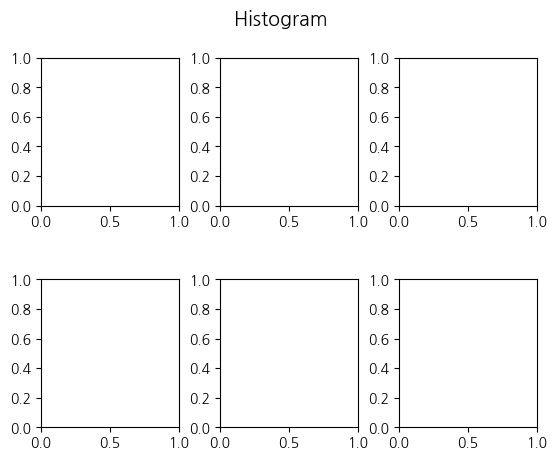

In [11]:
# (4단계) 히스토그램으로 관측값의 분포 확인
# 화면 분할 정의
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # 그래프 여백

# 통합 그래프에 제목 지정
fig.suptitle('Histogram', fontsize=14)

# 분할 그래프 화면에 나타내기
fig.show()

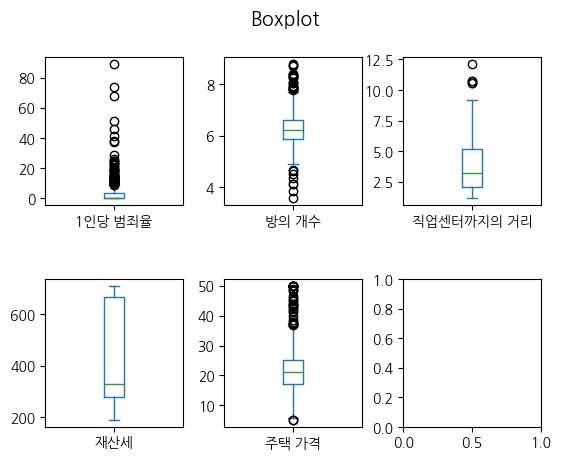

In [12]:
# (5단계) 상자그림으로 관측값의 분포 확인
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # 그래프 여백

# 각 분할 영역에 그래프 작성하기
for i in range(5):
    df[df.columns[i]].plot.box(ax=axes[i//3, i % 3], #matplotlib으로 그리기
                               label=titles[i])

fig.suptitle('Boxplot', fontsize=14)
fig.show()


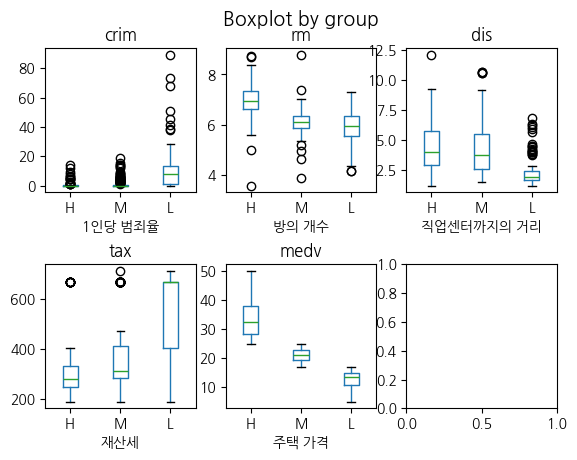

In [13]:
# (6단계) 그룹별 관측값의 분포 확인
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # 그래프 여백

# 각 분할 영역에 그래프 작성하기
for i in range(5):
    df.boxplot(column=df.columns[i], by='grp', grid=False,
               ax=axes[i//3, i % 3], xlabel=titles[i])

fig.suptitle('Boxplot by group', fontsize=14)
fig.show()

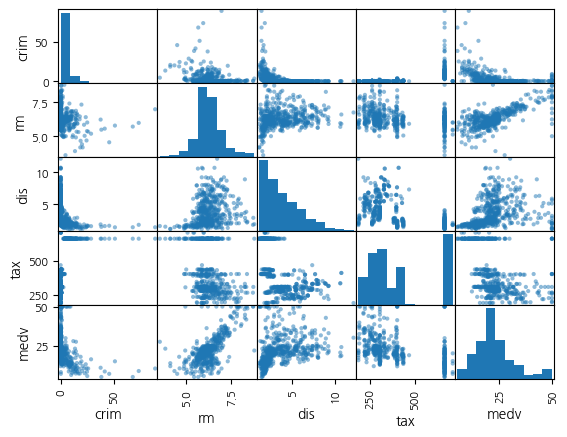

In [14]:
# (7단계) 다중 산점도를 통한 변수 간 상관관계의 확인
pd.plotting.scatter_matrix(df.iloc[:, :5])
plt.show()

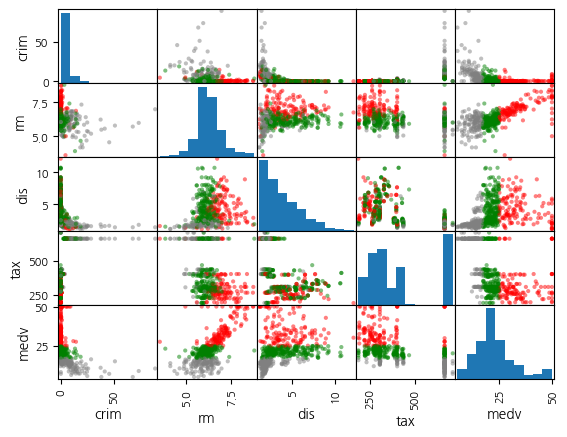

In [15]:
# (8단계) 그룹 정보를 포함한 변수 간 상관관계의 확인
dict = {'H': 'red', 'M': 'green', 'L': 'gray'}
colors = list(dict[key] for key in df.grp)  # 각 점의 색을 지정
pd.plotting.scatter_matrix(df.iloc[:, :5], c=colors)
plt.show()

In [16]:
# (9단계) 변수 간 상관계수의 확인
df.iloc[:, :5].corr()

,crim,rm,dis,tax,medv
crim,1.000000,-0.219247,-0.379670,0.582764,-0.388305
rm,-0.219247,1.000000,0.205246,-0.292048,0.695360
dis,-0.379670,0.205246,1.000000,-0.534432,0.249929
tax,0.582764,-0.292048,-0.534432,1.000000,-0.468536
medv,-0.388305,0.695360,0.249929,-0.468536,1.000000


추가 분석 1: 찰스강 인접 여부와 집값

(1)찰스강 인접 여부에 따라 집값 분포가 어떻게 다른지 비교해봅시다.

(2)Boxplot을 그려 두 그룹간 차이를 살펴봅시다.

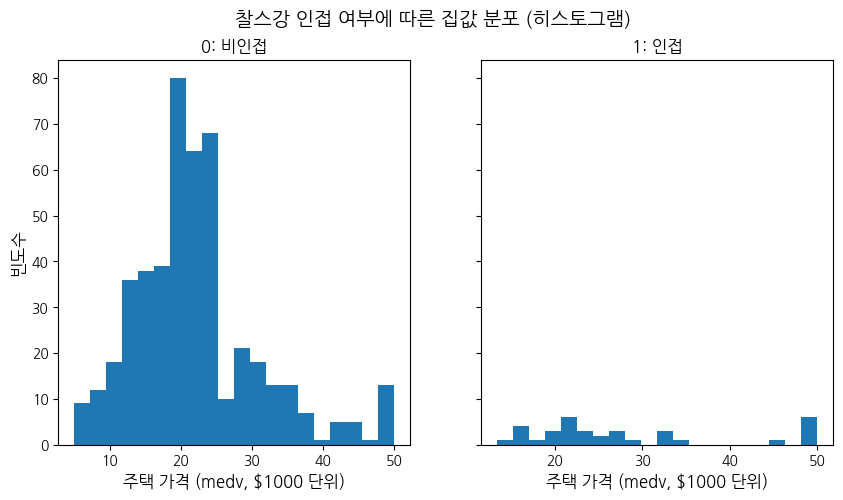

In [17]:
# 히스토그램으로 찰스강 인접 여부에 따른 집값 분포 비교
df = pd.read_csv('BostonHousing.csv')
# 찰스강 인접 여부에 따라 데이터 분할
df_chas_0 = df[df['chas'] == 0]['medv']
df_chas_1 = df[df['chas'] == 1]['medv']

# 히스토그램 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)

axes[0].hist(df_chas_0, bins=20)
axes[0].set_title('0: 비인접', fontproperties=fontprop)
axes[0].set_xlabel('주택 가격 (medv, $1000 단위)', fontproperties=fontprop)
axes[0].set_ylabel('빈도수', fontproperties=fontprop)

axes[1].hist(df_chas_1, bins=20)
axes[1].set_title('1: 인접', fontproperties=fontprop)
axes[1].set_xlabel('주택 가격 (medv, $1000 단위)', fontproperties=fontprop)

fig.suptitle('찰스강 인접 여부에 따른 집값 분포 (히스토그램)', fontsize=14, fontproperties=fontprop)
plt.show()

In [18]:
#갯수 출력
print("=== 표본 수 ===")
print(df['chas'].value_counts())

=== 표본 수 ===
chas
0    471
1     35
Name: count, dtype: int64


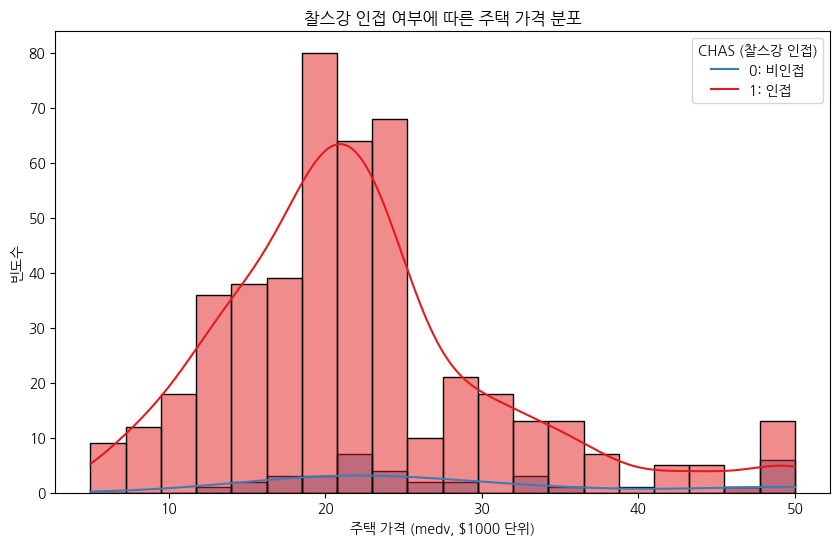

In [19]:
#확률 밀도 함수
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="medv", hue="chas", kde=True, bins=20, palette="Set1")

plt.title("찰스강 인접 여부에 따른 주택 가격 분포")
plt.xlabel("주택 가격 (medv, $1000 단위)")
plt.ylabel("빈도수")
plt.legend(title="CHAS (찰스강 인접)", labels=["0: 비인접", "1: 인접"])
plt.show()

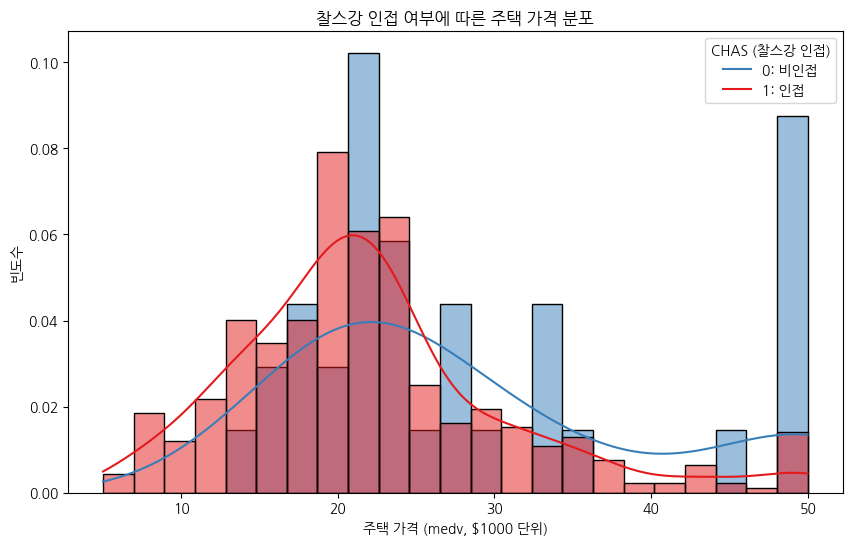

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="medv", hue="chas", kde=True, stat="density", common_norm=False, palette="Set1") #stat="density" 추가

plt.title("찰스강 인접 여부에 따른 주택 가격 분포")
plt.xlabel("주택 가격 (medv, $1000 단위)")
plt.ylabel("빈도수")
plt.legend(title="CHAS (찰스강 인접)", labels=["0: 비인접", "1: 인접"])
plt.show()

/tmp/ipython-input-2437093335.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([chas0, chas1], labels=['비인접(0)', '인접(1)'])


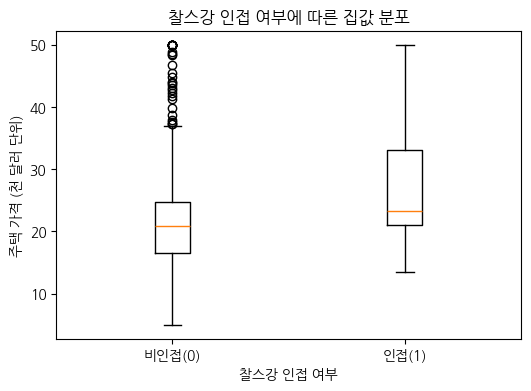

In [24]:
# 찰스강 인접 여부에 따른 집값 분포 비교 (matplotlib만 사용)

# (1) CHAS(찰스강 인접 여부)와 MEDV(집값) 추출
chas0 = df[df['chas'] == 0]['medv']
chas1 = df[df['chas'] == 1]['medv']

# (2) Boxplot 시각화
plt.figure(figsize=(6, 4))
plt.boxplot([chas0, chas1], labels=['비인접(0)', '인접(1)'])
plt.xlabel('찰스강 인접 여부')
plt.ylabel('주택 가격 (천 달러 단위)')
plt.title('찰스강 인접 여부에 따른 집값 분포')
plt.show()
#중앙값은 크게 차이가 안남

추가분석 2: 집값에 영향을 주는 주요 변수 찾기

(1) 전체 변수와 집값 간 상관계수를 계산하여 히트맵을 그려봅시다.

(2) MEDV와 가장 강한 상관 관계를 가지는 상위 3개 변수를 찾아봅시다.


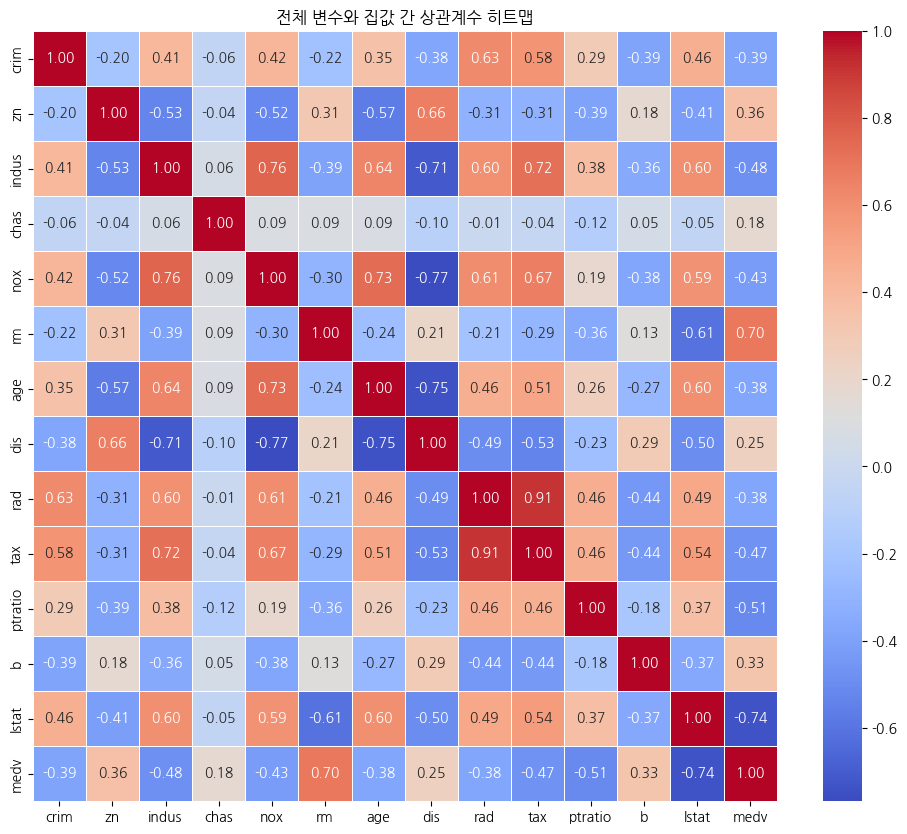

In [21]:
# 전체 변수와 집값 간 상관계수 계산
correlation_matrix = df.corr()

# 히트맵으로 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("전체 변수와 집값 간 상관계수 히트맵")
plt.show()


In [22]:
# MEDV와 다른 변수들 간의 상관계수 추출
medv_correlation = correlation_matrix['medv']

# MEDV와의 상관관계 절댓값으로 정렬 (MEDV 자신 제외)
sorted_correlation = medv_correlation.abs().sort_values(ascending=False)[1:]

# 상위 3개 변수 출력
top_3_variables = sorted_correlation.head(3)
print("MEDV와 가장 강한 상관 관계를 가지는 상위 3개 변수:")
print(top_3_variables)

MEDV와 가장 강한 상관 관계를 가지는 상위 3개 변수:
lstat      0.737663
rm         0.695360
ptratio    0.507787
Name: medv, dtype: float64
